In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from matplotlib import font_manager

# 设置中文字体，防止中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 防止负号显示为方块

# 如果需要查看系统中可用的字体，可以使用以下代码：
# for font in font_manager.fontManager.ttflist:
#     print(font.name)

# 使用原始字符串来避免转义问题
excel_file = r'C:\Users\Administrator\Desktop\附件1.xlsx'

# 读取Excel文件
df = pd.read_excel(excel_file)

# 数据预处理
df['地块面积/亩'] = pd.to_numeric(df['地块面积/亩'], errors='coerce')

# 计算每种地块类型的总面积
area_by_type = df.groupby('地块类型')['地块面积/亩'].sum().sort_values(ascending=False)

# 创建图表
plt.figure(figsize=(12, 6))

# 绘制条形图
sns.barplot(x=area_by_type.index, y=area_by_type.values)

plt.title('各类型地块总面积比较')
plt.xlabel('地块类型')
plt.ylabel('总面积（亩）')
plt.xticks(rotation=45)

# 在每个条形上添加数值标签
for i, v in enumerate(area_by_type.values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig(r'C:\Users\Administrator\Desktop\地块类型面积比较.png')
plt.close()

# 绘制饼图
plt.figure(figsize=(10, 10))
plt.pie(area_by_type.values, labels=area_by_type.index, autopct='%1.1f%%', startangle=90)
plt.title('各类型地块面积占比')
plt.axis('equal')
plt.savefig(r'C:\Users\Administrator\Desktop\地块类型面积占比.png')
plt.close()

# 统计各类型地块的数量
count_by_type = df['地块类型'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='地块类型', data=df, order=count_by_type.index)
plt.title('各类型地块数量统计')
plt.xlabel('地块类型')
plt.ylabel('数量')
plt.xticks(rotation=45)

for i, v in enumerate(count_by_type):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.savefig(r'C:\Users\Administrator\Desktop\地块类型数量统计.png')
plt.close()

print("可视化图表已生成完毕，请查看桌面上保存的PNG文件。")


可视化图表已生成完毕，请查看桌面上保存的PNG文件。


数据前5行：
  种植地块  作物编号 作物名称    作物类型  种植面积/亩 种植季次
0   A1     6   小麦      粮食    80.0   单季
1   A2     7   玉米      粮食    55.0   单季
2   A3     7   玉米      粮食    35.0   单季
3   A4     1   黄豆  粮食（豆类）    72.0   单季
4   A5     4   绿豆  粮食（豆类）    68.0   单季


C:\Users\Administrator\AppData\Local\Temp\ipykernel_44684\1313028635.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # 填充空白单元格


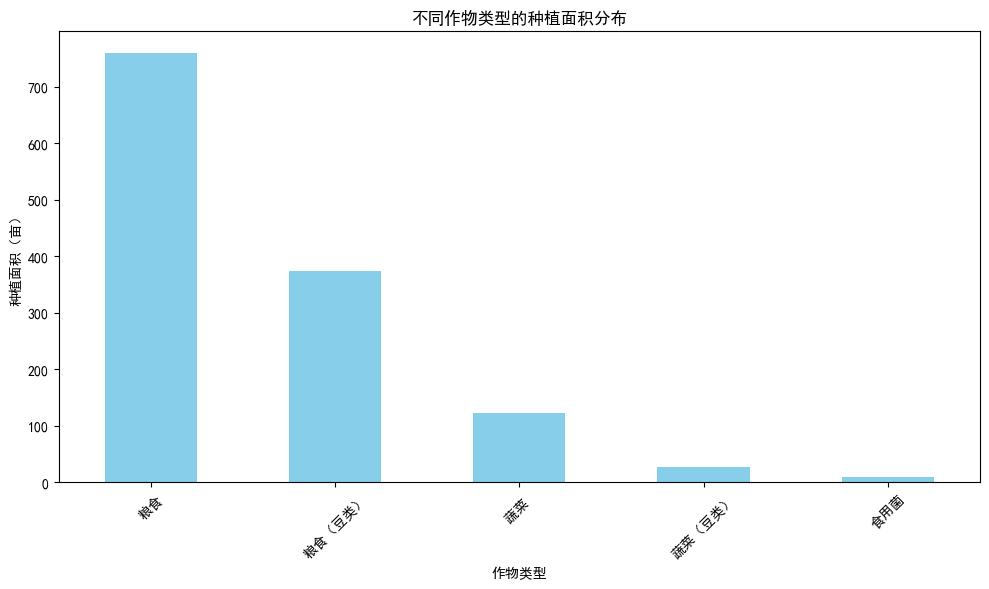

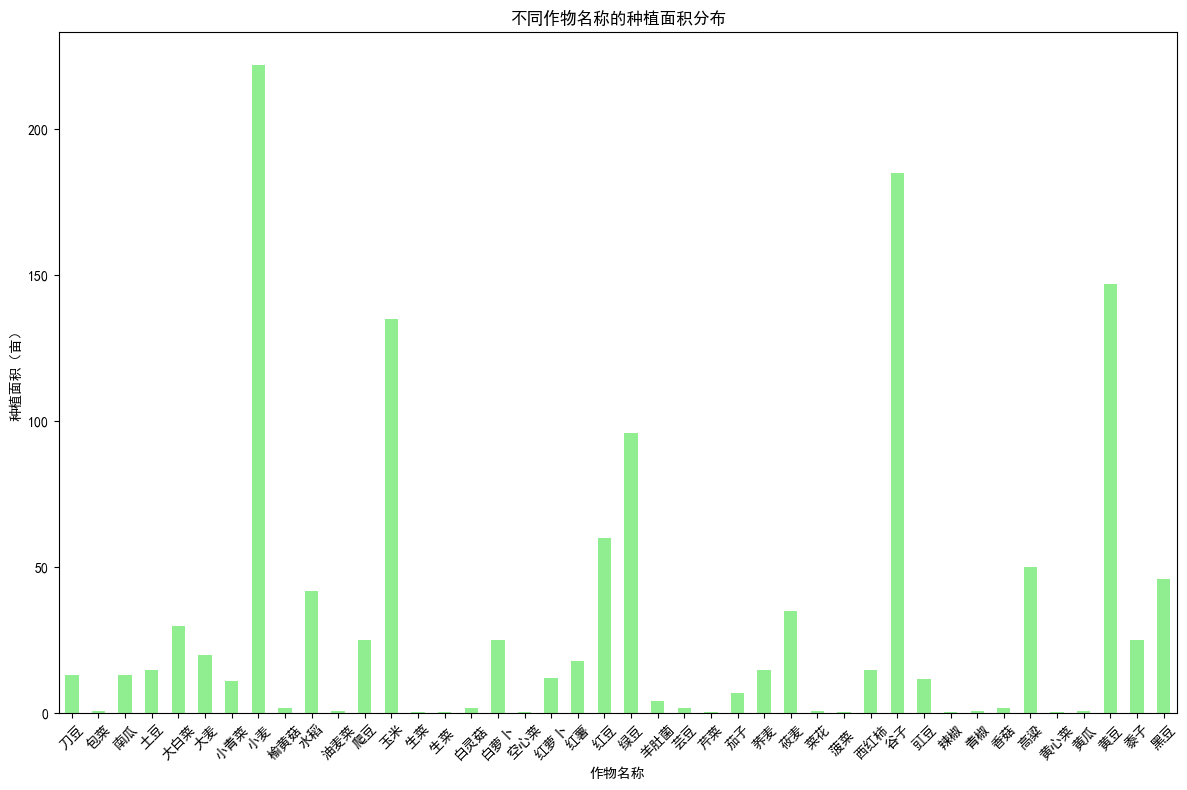

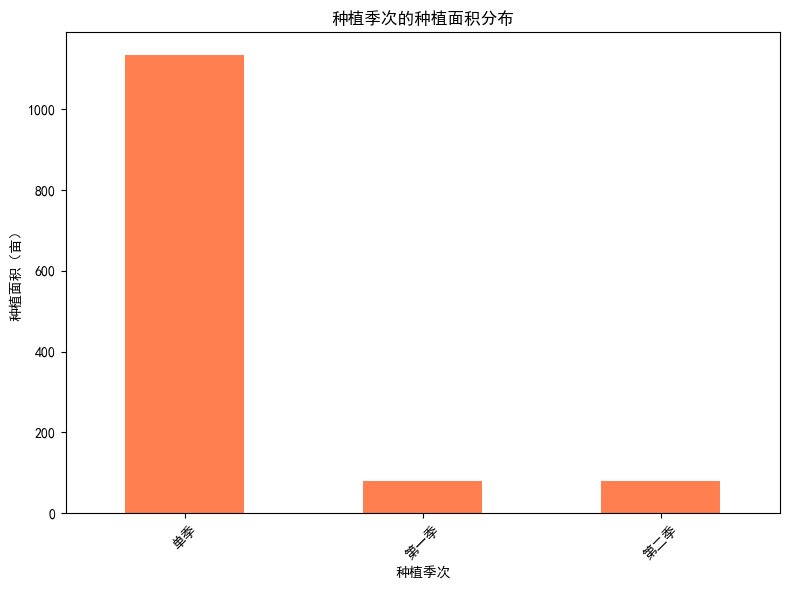

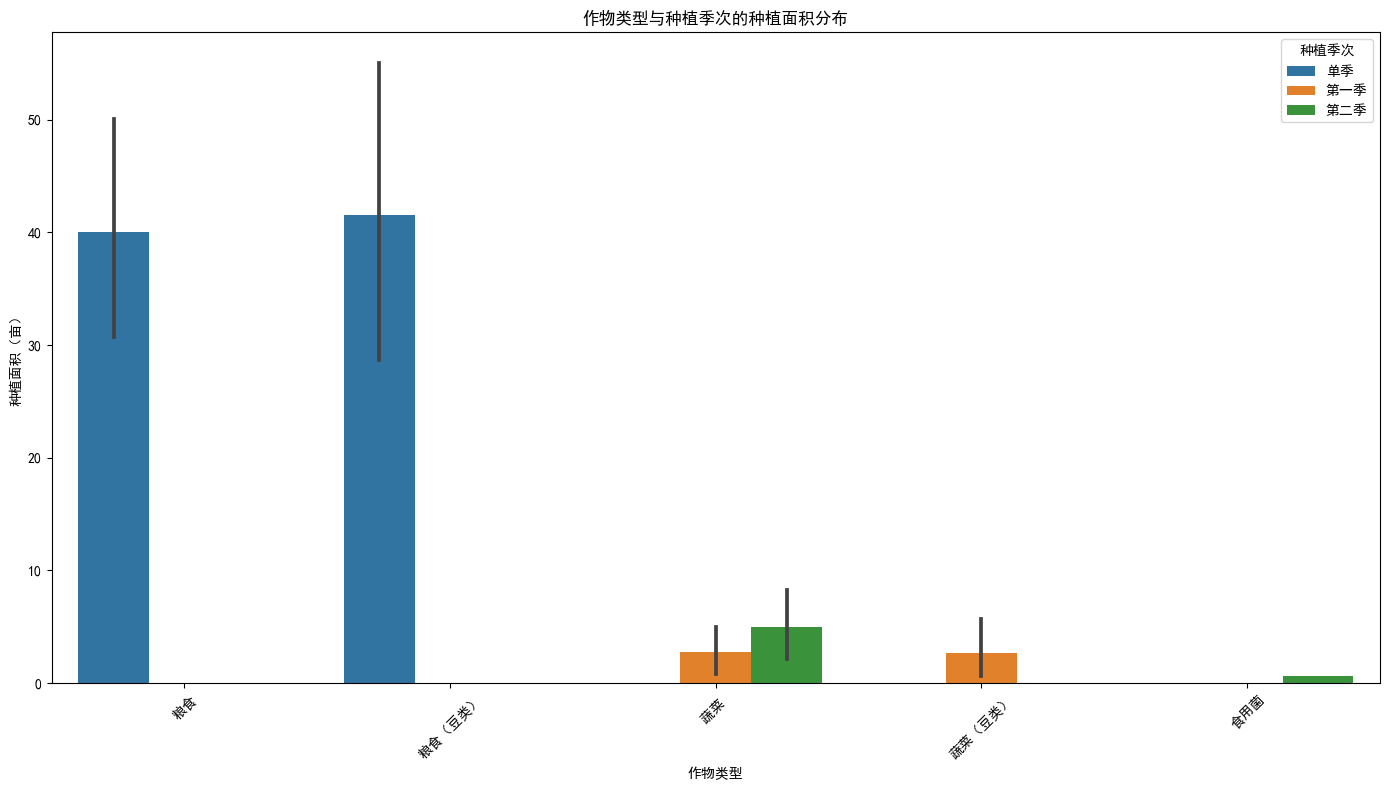


数据描述统计：
            作物编号     种植面积/亩
count  87.000000  87.000000
mean   22.390805  14.850575
std    12.660464  21.653776
min     1.000000   0.300000
25%    11.500000   0.600000
50%    22.000000   0.600000
75%    34.500000  20.000000
max    41.000000  86.000000


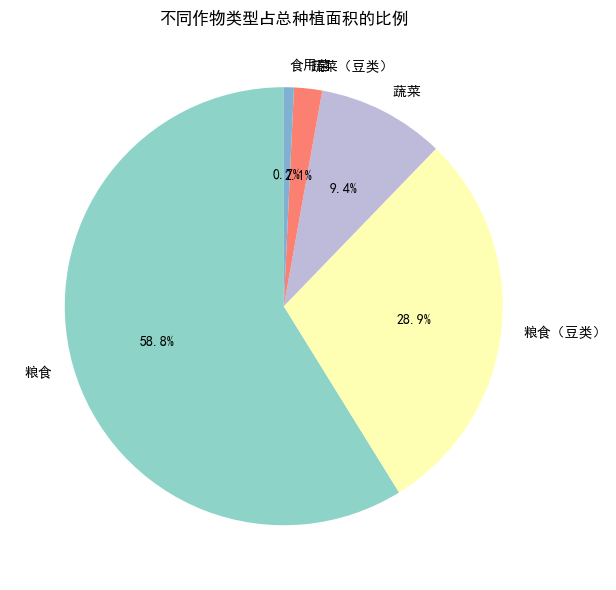


按作物类型和种植季次的种植面积透视表：
种植季次       单季   第一季   第二季
作物类型                     
粮食      760.0   NaN   NaN
粮食（豆类）  374.0   NaN   NaN
蔬菜        NaN  52.2  69.4
蔬菜（豆类）    NaN  26.8   NaN
食用菌       NaN   NaN   9.6


D:\my_software\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


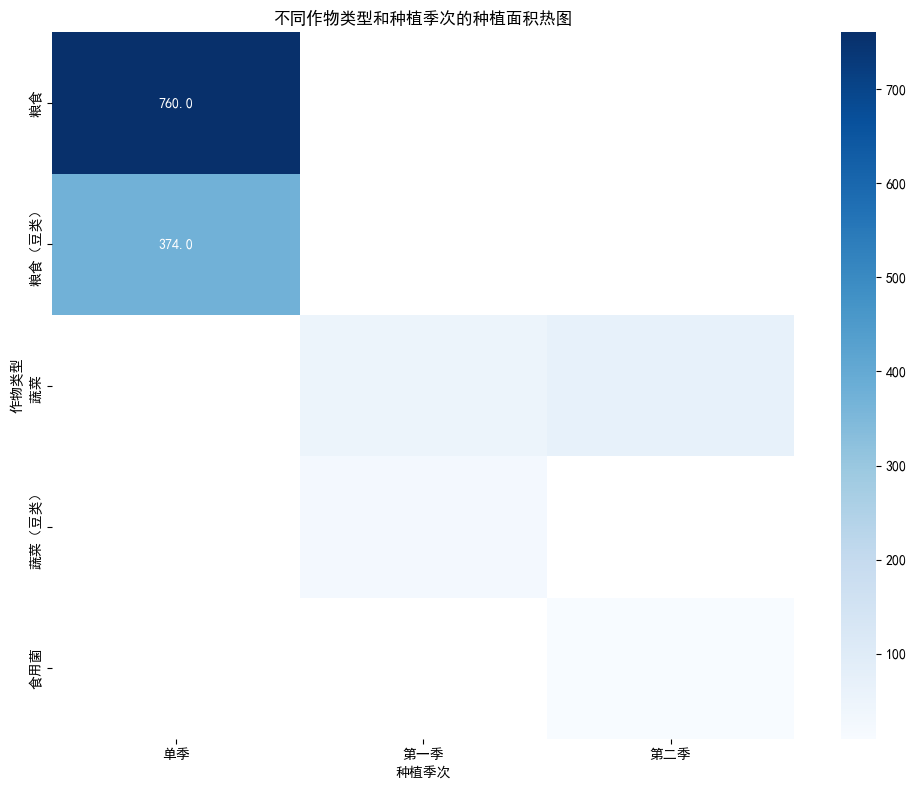

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取 Excel 文件
file_path = r'C:\Users\Administrator\Desktop\附件2.xlsx'  # 替换为实际文件路径
df = pd.read_excel(file_path)

# 查看数据是否正确读取
print("数据前5行：")
print(df.head())

# 处理空白单元格
df = df.fillna(method='ffill')  # 填充空白单元格

# 作物类型和种植面积统计
crop_type_area = df.groupby('作物类型')['种植面积/亩'].sum()
crop_name_area = df.groupby('作物名称')['种植面积/亩'].sum()
planting_season_area = df.groupby('种植季次')['种植面积/亩'].sum()

# 可视化作物类型的种植面积分布
plt.figure(figsize=(10, 6))
crop_type_area.plot(kind='bar', color='skyblue')
plt.title('不同作物类型的种植面积分布')
plt.xlabel('作物类型')
plt.ylabel('种植面积（亩）')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 可视化作物名称的种植面积分布
plt.figure(figsize=(12, 8))
crop_name_area.plot(kind='bar', color='lightgreen')
plt.title('不同作物名称的种植面积分布')
plt.xlabel('作物名称')
plt.ylabel('种植面积（亩）')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 可视化种植季次的种植面积分布
plt.figure(figsize=(8, 6))
planting_season_area.plot(kind='bar', color='coral')
plt.title('种植季次的种植面积分布')
plt.xlabel('种植季次')
plt.ylabel('种植面积（亩）')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 使用 seaborn 可视化不同作物类型、种植季次与面积的关系
plt.figure(figsize=(14, 8))
sns.barplot(x='作物类型', y='种植面积/亩', hue='种植季次', data=df)
plt.title('作物类型与种植季次的种植面积分布')
plt.xlabel('作物类型')
plt.ylabel('种植面积（亩）')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 查看数据的详细描述
print("\n数据描述统计：")
print(df.describe())

# 计算不同作物类型所占的比例
crop_type_percentage = df.groupby('作物类型')['种植面积/亩'].sum() / df['种植面积/亩'].sum() * 100

# 可视化作物类型占比
plt.figure(figsize=(10, 6))
crop_type_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('不同作物类型占总种植面积的比例')
plt.ylabel('')  # 隐藏默认的y标签
plt.tight_layout()
plt.show()

# 数据透视表分析，按作物类型和季次查看种植面积
pivot_table = pd.pivot_table(df, values='种植面积/亩', index='作物类型', columns='种植季次', aggfunc='sum')
print("\n按作物类型和种植季次的种植面积透视表：")
print(pivot_table)

# 可视化透视表
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='Blues')
plt.title('不同作物类型和种植季次的种植面积热图')
plt.xlabel('种植季次')
plt.ylabel('作物类型')
plt.tight_layout()
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_44684\2137577431.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


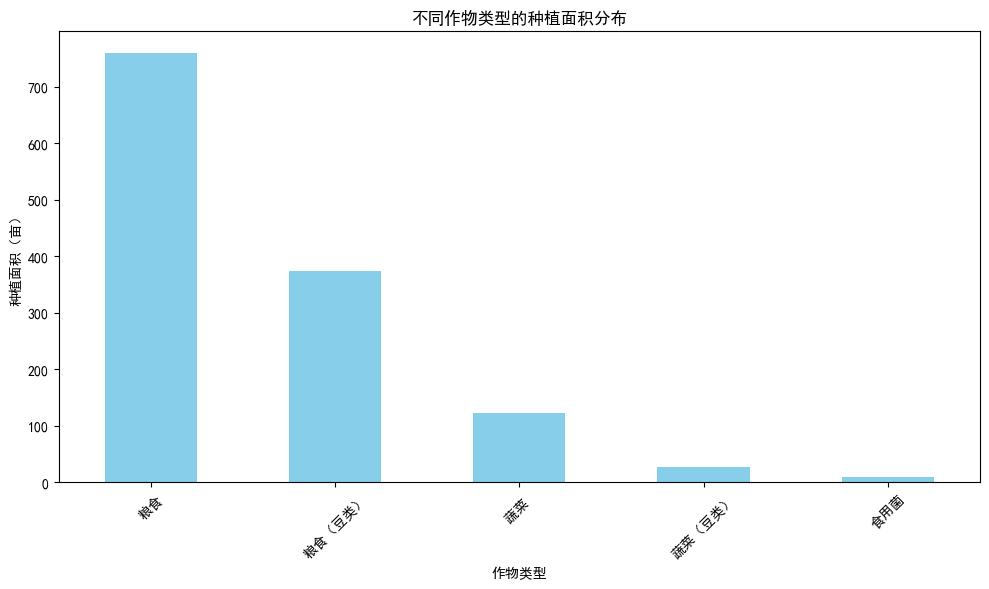

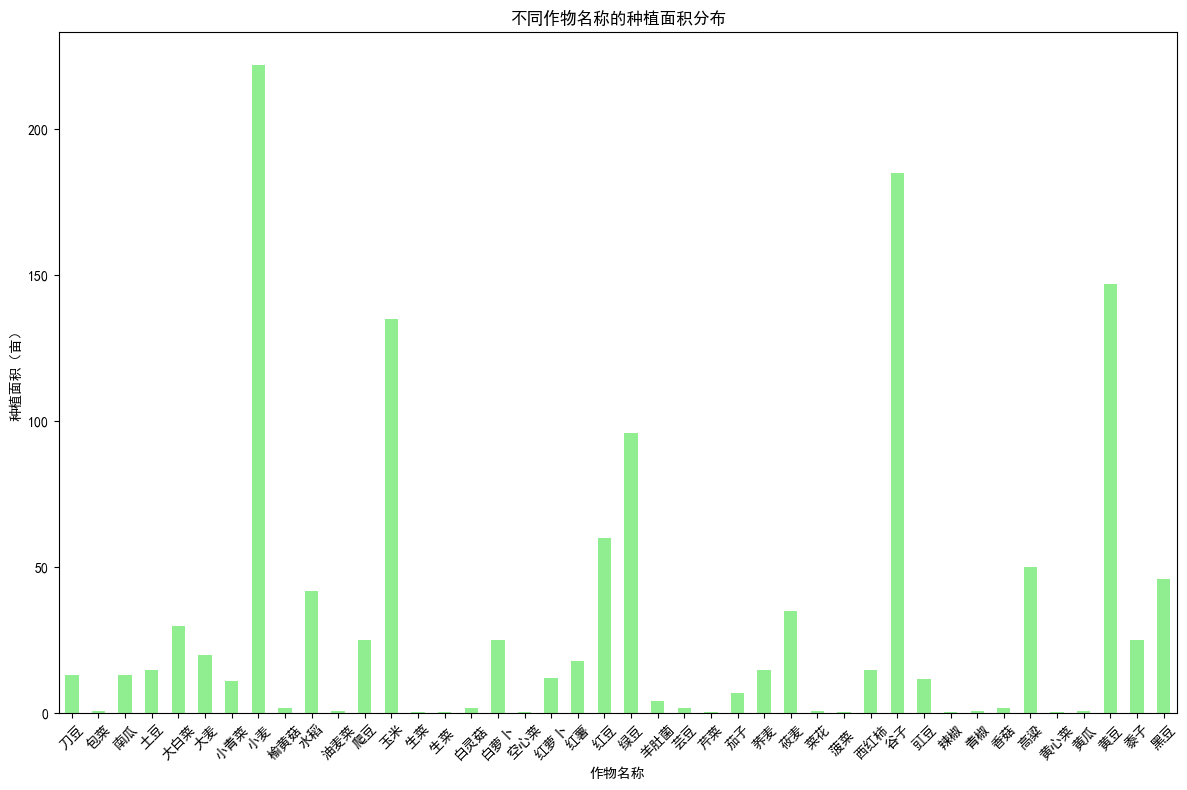

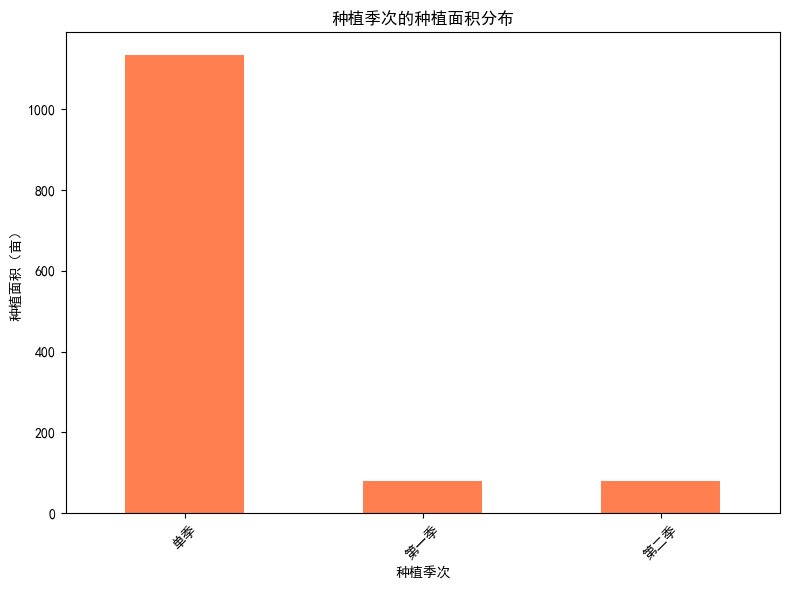

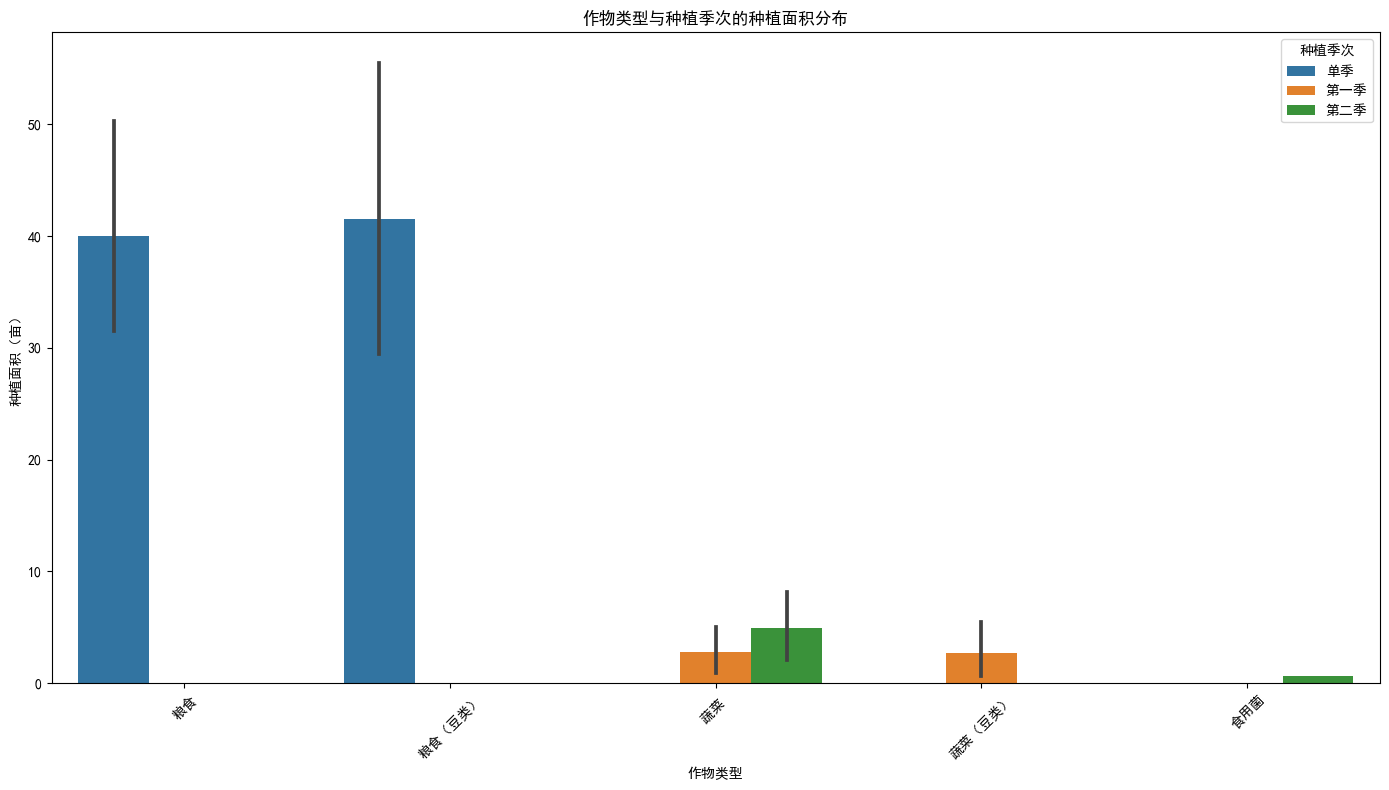

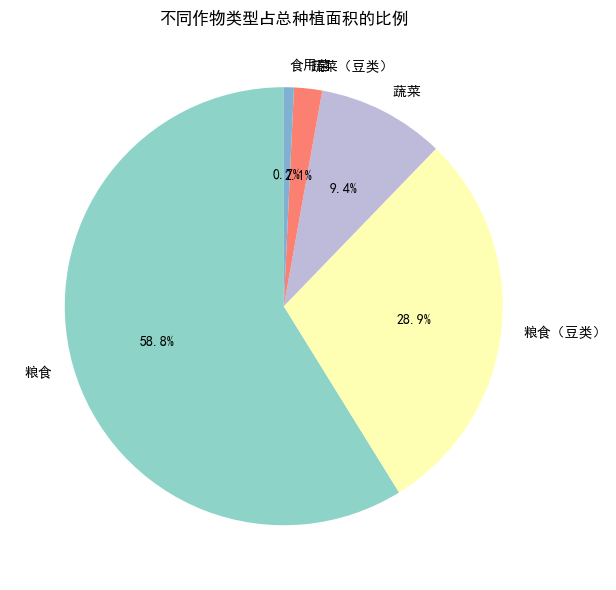

D:\my_software\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


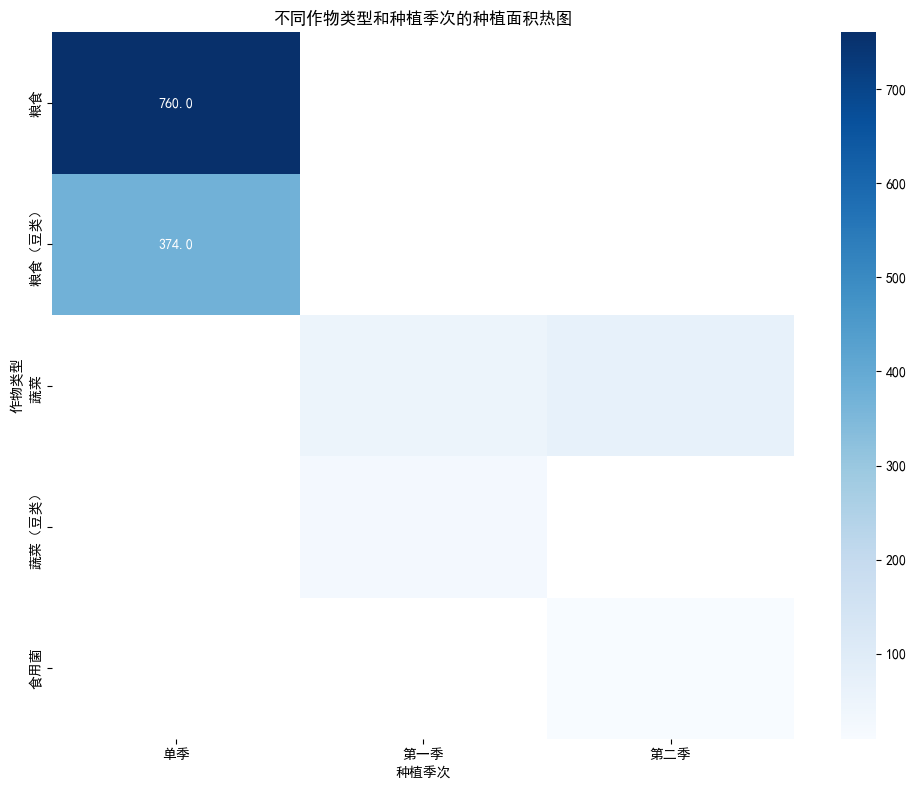

所有分析结果已保存至 ./output/crop_analysis_results.xlsx


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取 Excel 文件
file_path = r'C:\Users\Administrator\Desktop\附件2.xlsx'  # 替换为实际文件路径
df = pd.read_excel(file_path)

# 处理空白单元格
df = df.fillna(method='ffill')

# 作物类型和种植面积统计
crop_type_area = df.groupby('作物类型')['种植面积/亩'].sum()
crop_name_area = df.groupby('作物名称')['种植面积/亩'].sum()
planting_season_area = df.groupby('种植季次')['种植面积/亩'].sum()

# 设置保存路径
output_folder = './output/'  # 确保该文件夹存在

# 可视化作物类型的种植面积分布并保存
plt.figure(figsize=(10, 6))
crop_type_area.plot(kind='bar', color='skyblue')
plt.title('不同作物类型的种植面积分布')
plt.xlabel('作物类型')
plt.ylabel('种植面积（亩）')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_folder + 'crop_type_area.png')  # 保存图像
plt.show()

# 可视化作物名称的种植面积分布并保存
plt.figure(figsize=(12, 8))
crop_name_area.plot(kind='bar', color='lightgreen')
plt.title('不同作物名称的种植面积分布')
plt.xlabel('作物名称')
plt.ylabel('种植面积（亩）')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_folder + 'crop_name_area.png')  # 保存图像
plt.show()

# 可视化种植季次的种植面积分布并保存
plt.figure(figsize=(8, 6))
planting_season_area.plot(kind='bar', color='coral')
plt.title('种植季次的种植面积分布')
plt.xlabel('种植季次')
plt.ylabel('种植面积（亩）')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_folder + 'planting_season_area.png')  # 保存图像
plt.show()

# 使用 seaborn 可视化不同作物类型、种植季次与面积的关系并保存
plt.figure(figsize=(14, 8))
sns.barplot(x='作物类型', y='种植面积/亩', hue='种植季次', data=df)
plt.title('作物类型与种植季次的种植面积分布')
plt.xlabel('作物类型')
plt.ylabel('种植面积（亩）')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_folder + 'crop_type_vs_season_area.png')  # 保存图像
plt.show()

# 计算不同作物类型所占的比例
crop_type_percentage = df.groupby('作物类型')['种植面积/亩'].sum() / df['种植面积/亩'].sum() * 100

# 可视化作物类型占比并保存
plt.figure(figsize=(10, 6))
crop_type_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('不同作物类型占总种植面积的比例')
plt.ylabel('')  # 隐藏默认的y标签
plt.tight_layout()
plt.savefig(output_folder + 'crop_type_percentage.png')  # 保存图像
plt.show()

# 数据透视表分析，按作物类型和季次查看种植面积
pivot_table = pd.pivot_table(df, values='种植面积/亩', index='作物类型', columns='种植季次', aggfunc='sum')

# 可视化透视表并保存
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='Blues')
plt.title('不同作物类型和种植季次的种植面积热图')
plt.xlabel('种植季次')
plt.ylabel('作物类型')
plt.tight_layout()
plt.savefig(output_folder + 'crop_type_season_heatmap.png')  # 保存图像
plt.show()

# 保存分析结果到 Excel 文件
output_excel = output_folder + 'crop_analysis_results.xlsx'
with pd.ExcelWriter(output_excel) as writer:
    crop_type_area.to_excel(writer, sheet_name='作物类型种植面积')
    crop_name_area.to_excel(writer, sheet_name='作物名称种植面积')
    planting_season_area.to_excel(writer, sheet_name='种植季次种植面积')
    pivot_table.to_excel(writer, sheet_name='透视表分析')
    
print(f"所有分析结果已保存至 {output_excel}")

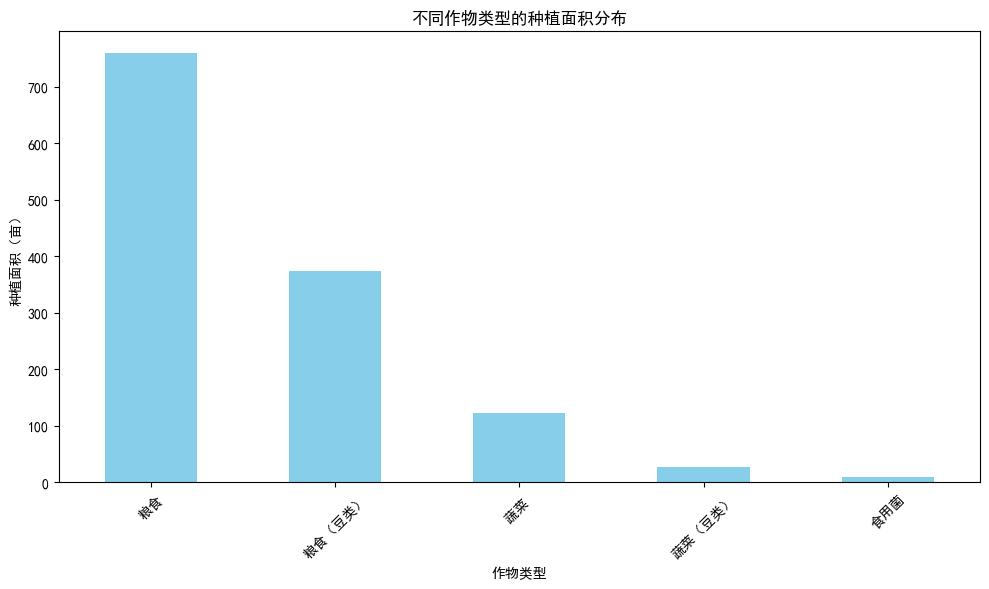

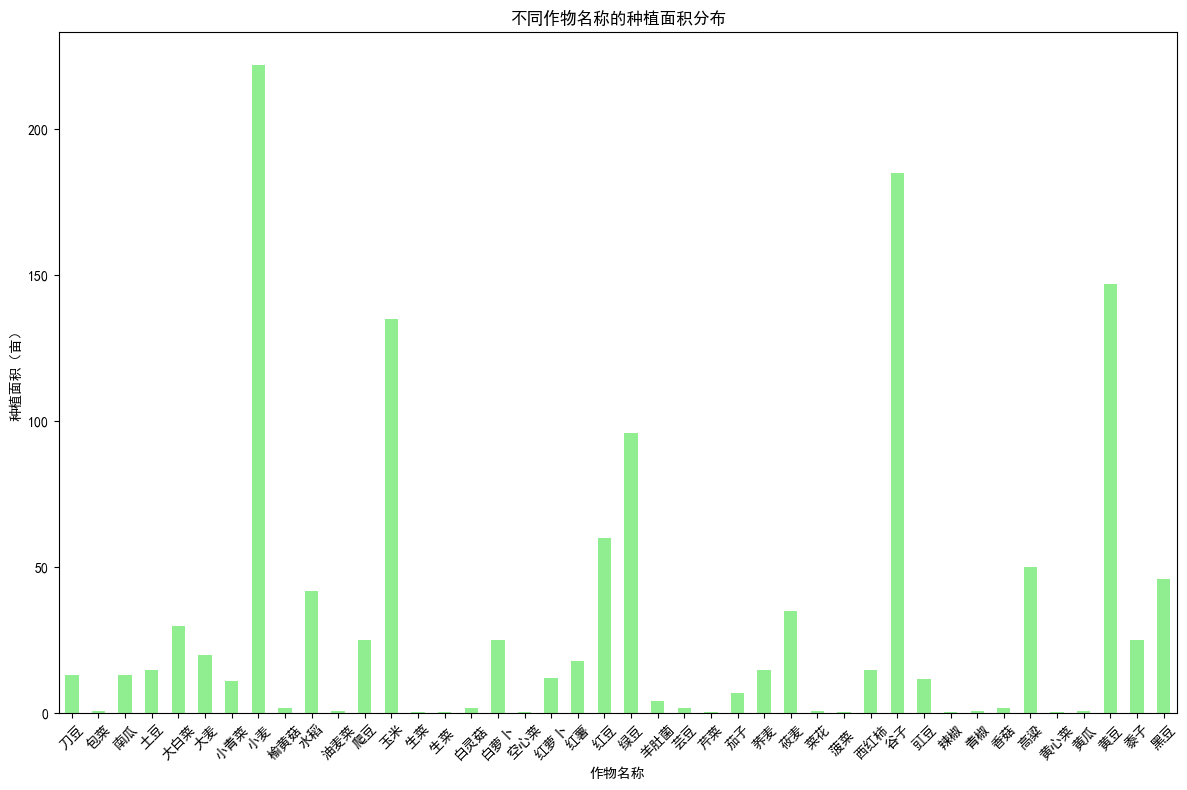

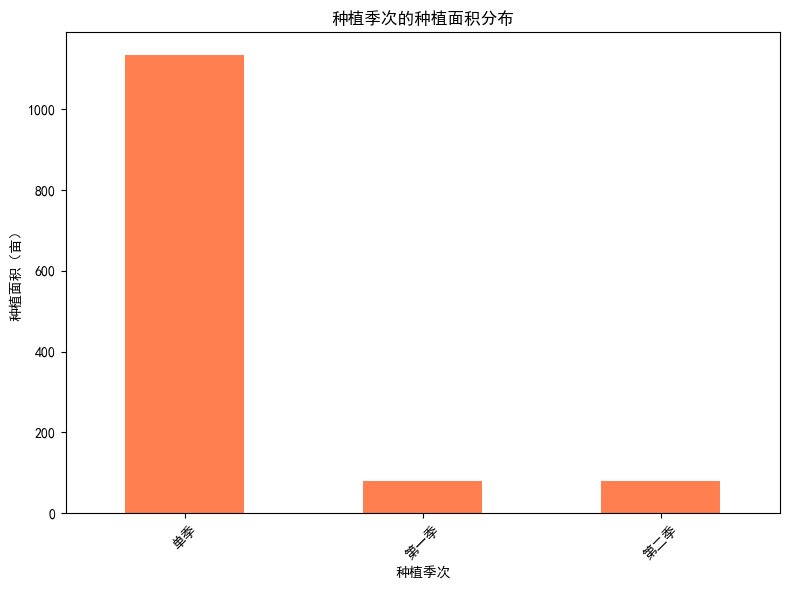

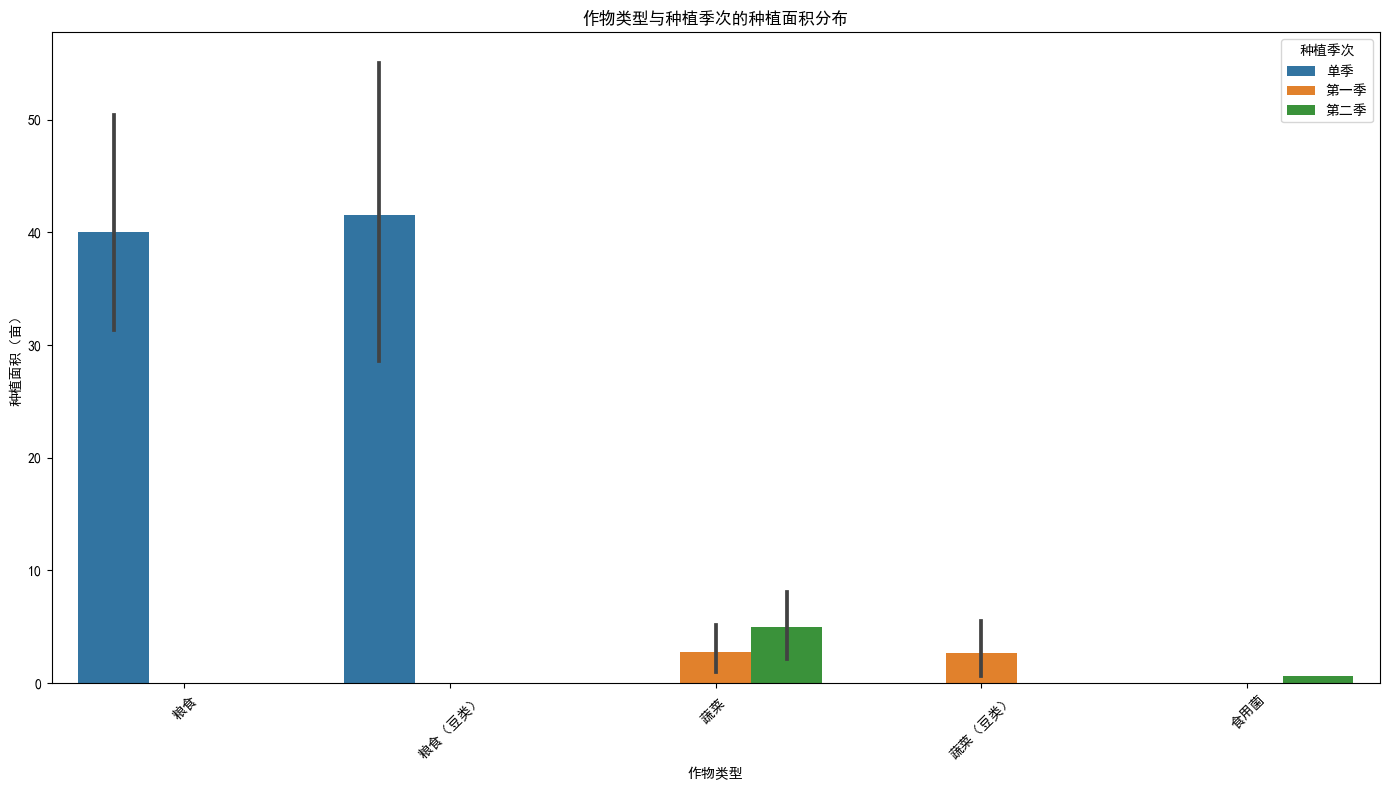

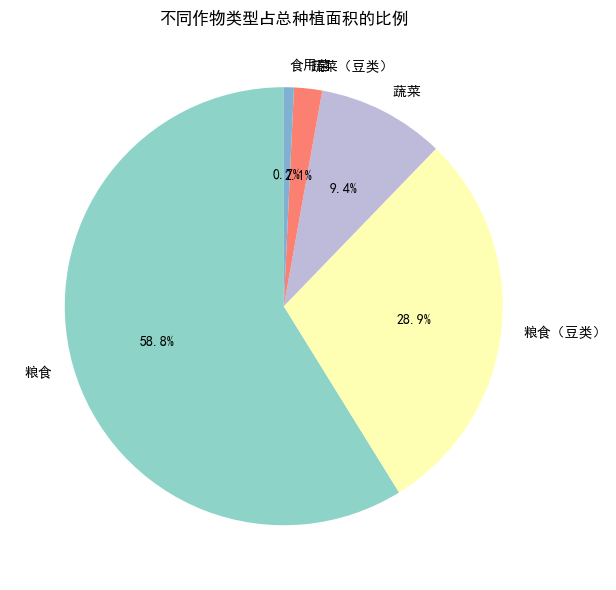

D:\my_software\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


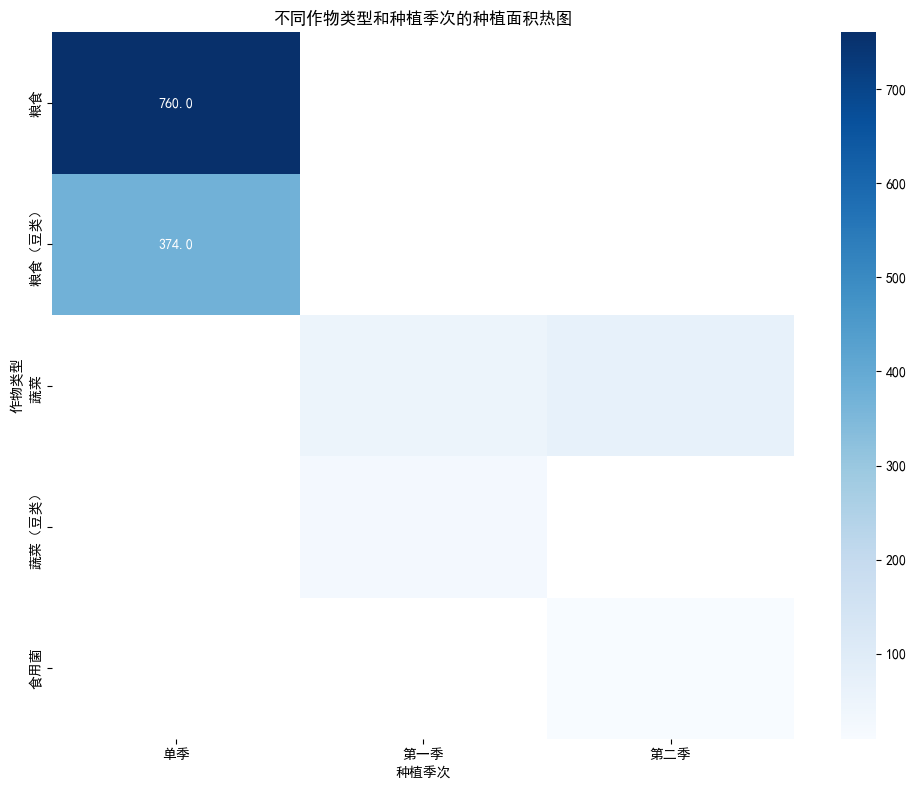

PermissionError: [Errno 13] Permission denied: './output/crop_analysis_results.xlsx'

  序号 作物编号 作物名称 地块类型 种植季次  亩产量/斤  种植成本/(元/亩) 销售单价/(元/斤)
0  1    1   黄豆  平旱地   单季  400.0       400.0  2.50-4.00
1  2    2   黑豆  平旱地   单季  500.0       400.0  6.50-8.50
2  3    3   红豆  平旱地   单季  400.0       350.0  7.50-9.00
3  4    4   绿豆  平旱地   单季  350.0       350.0  6.00-8.00
4  5    5   爬豆  平旱地   单季  415.0       350.0  6.00-7.50


C:\Users\Administrator\AppData\Local\Temp\ipykernel_44684\436865640.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


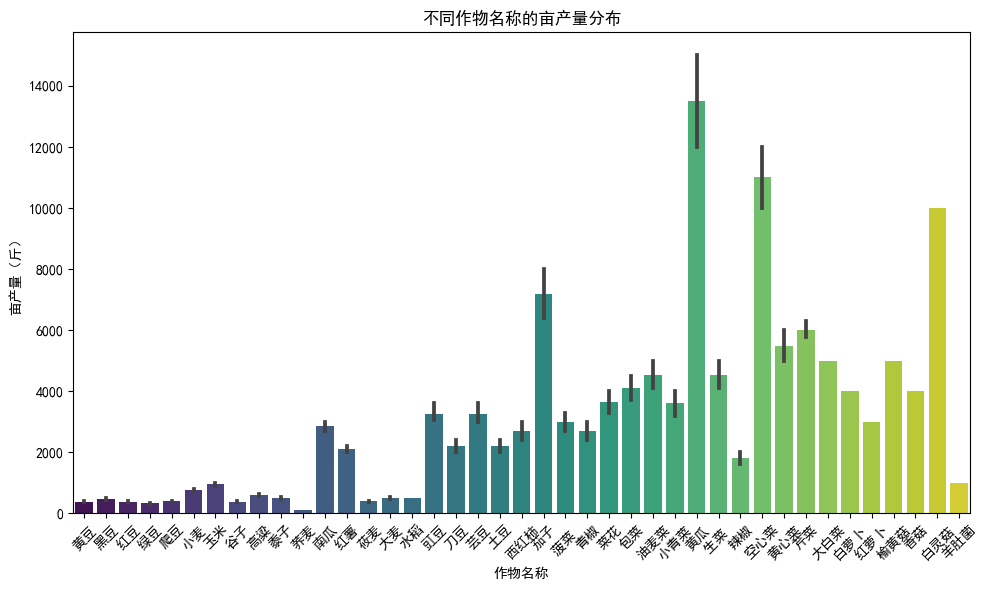

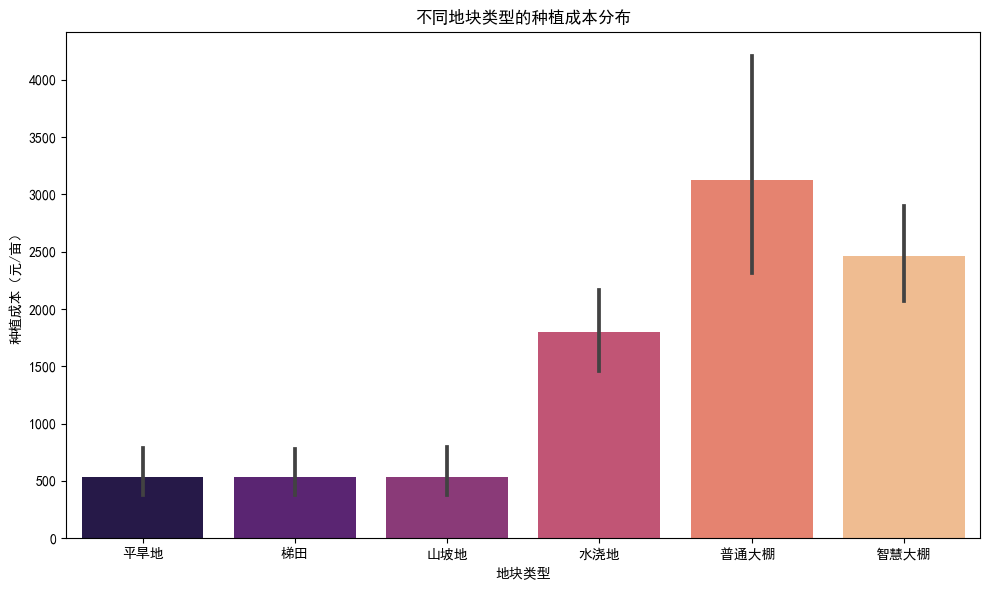

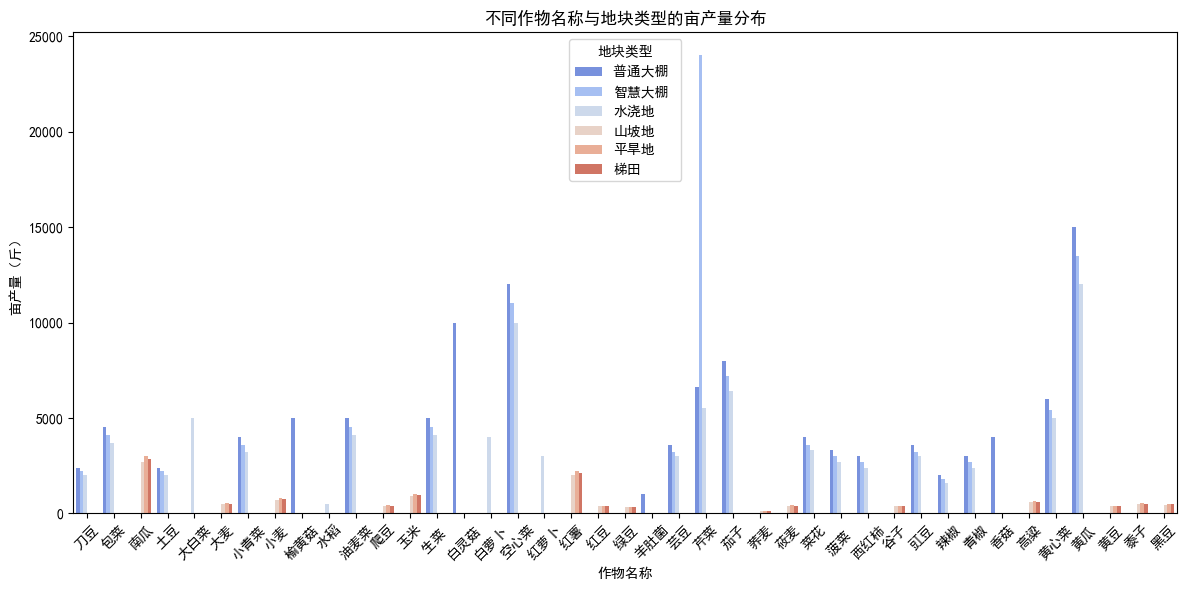

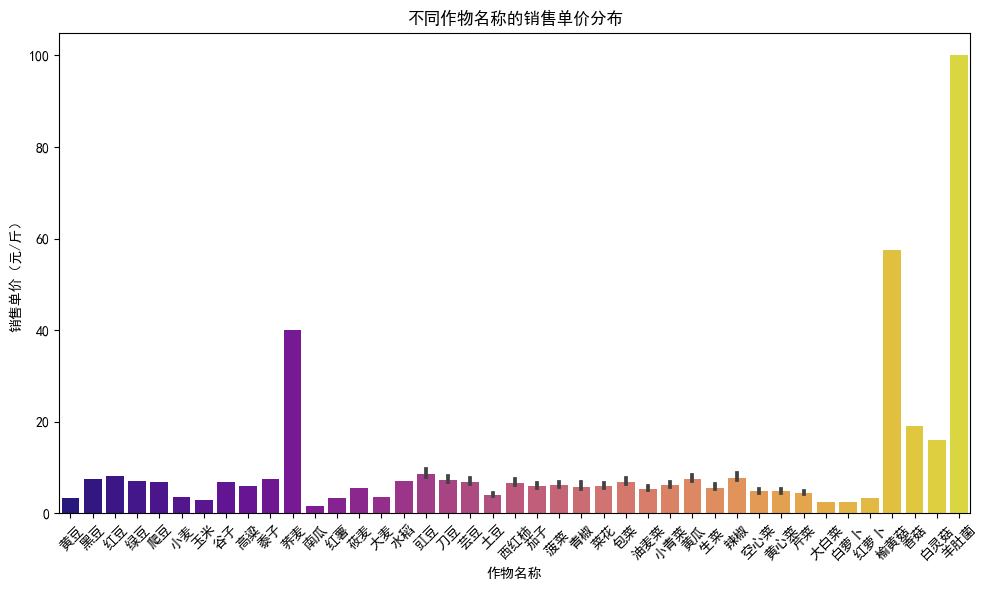

所有分析结果已保存至 ./output2/crop_analysis_results.xlsx


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 读取 Excel 文件
file_path = r'C:\Users\Administrator\Desktop\附件2.xlsx'  # 替换为实际文件路径
df = pd.read_excel(file_path)

# 检查数据
print(df.head())

# 设置保存路径
output_folder = './output2/'
os.makedirs(output_folder, exist_ok=True)

# 填充空白单元格
df = df.fillna(method='ffill')

# 数据转换：将范围转换为均值，简化分析
df['销售单价/(元/斤)'] = df['销售单价/(元/斤)'].apply(lambda x: sum([float(i) for i in x.split('-')]) / 2)

# 可视化不同作物名称的亩产量
plt.figure(figsize=(10, 6))
sns.barplot(x='作物名称', y='亩产量/斤', data=df, palette='viridis')
plt.title('不同作物名称的亩产量分布')
plt.xlabel('作物名称')
plt.ylabel('亩产量（斤）')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_folder + 'crop_yield_distribution.png')  # 保存图像
plt.show()

# 可视化不同地块类型的种植成本
plt.figure(figsize=(10, 6))
sns.barplot(x='地块类型', y='种植成本/(元/亩)', data=df, palette='magma')
plt.title('不同地块类型的种植成本分布')
plt.xlabel('地块类型')
plt.ylabel('种植成本（元/亩）')
plt.tight_layout()
plt.savefig(output_folder + 'land_cost_distribution.png')  # 保存图像
plt.show()

# 按作物名称和地块类型分组，统计亩产量和种植成本
grouped_df = df.groupby(['作物名称', '地块类型']).agg({'亩产量/斤': 'sum', '种植成本/(元/亩)': 'mean'}).reset_index()

# 可视化作物名称与地块类型的亩产量
plt.figure(figsize=(12, 6))
sns.barplot(x='作物名称', y='亩产量/斤', hue='地块类型', data=grouped_df, palette='coolwarm')
plt.title('不同作物名称与地块类型的亩产量分布')
plt.xlabel('作物名称')
plt.ylabel('亩产量（斤）')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_folder + 'crop_yield_by_land_type.png')  # 保存图像
plt.show()

# 可视化不同作物名称的销售单价分布
plt.figure(figsize=(10, 6))
sns.barplot(x='作物名称', y='销售单价/(元/斤)', data=df, palette='plasma')
plt.title('不同作物名称的销售单价分布')
plt.xlabel('作物名称')
plt.ylabel('销售单价（元/斤）')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_folder + 'crop_price_distribution.png')  # 保存图像
plt.show()

# 保存分析结果到 Excel 文件
output_excel = output_folder + 'crop_analysis_results.xlsx'
grouped_df.to_excel(output_excel, index=False)

print(f"所有分析结果已保存至 {output_excel}")


In [6]:
import pulp
import pandas as pd
import numpy as np

def load_data():
    attachment1_path = r"C:\Users\Administrator\Desktop\附件1.xlsx"
    attachment2_path = r"C:\Users\Administrator\Desktop\附件2.xlsx"

    fields = pd.read_excel(attachment1_path, sheet_name=0)
    fields = fields.rename(columns={'地块名称': 'name', '地块类型': 'type', '地块面积/亩': 'area'})

    crops = pd.read_excel(attachment1_path, sheet_name=1)
    crops = crops.rename(columns={'作物编号': 'id', '作物名称': 'name', '作物类型': 'type', '种植耕地': 'suitable_fields'})
    crops = crops.dropna(subset=['id'])
    crops = crops[crops['id'].apply(lambda x: str(x).isdigit())]
    crops['id'] = crops['id'].astype(int)

    planting_2023 = pd.read_excel(attachment2_path, sheet_name=1)
    planting_2023 = planting_2023.rename(columns={'种植地块': 'field', '作物编号': 'crop_id', '作物名称': 'crop_name', 
                                                  '作物类型': 'crop_type', '种植面积/亩': 'area', '种植季次': 'season'})

    stats_2023 = pd.read_excel(attachment2_path, sheet_name=0)
    stats_2023 = stats_2023.rename(columns={'序号': 'index', '作物编号': 'crop_id', '作物名称': 'crop_name', 
                                            '地块类型': 'field_type', '种植季次': 'season', '亩产量/斤': 'yield_per_mu',
                                            '种植成本/(元/亩)': 'cost_per_mu', '销售单价/(元/斤)': 'price_range'})
    
    stats_2023 = stats_2023.dropna(subset=['crop_id'])
    stats_2023 = stats_2023[stats_2023['crop_id'].apply(lambda x: str(x).isdigit())]
    stats_2023['crop_id'] = stats_2023['crop_id'].astype(int)
    
    stats_2023[['min_price', 'max_price']] = stats_2023['price_range'].str.split('-', expand=True).astype(float)
    stats_2023['avg_price'] = (stats_2023['min_price'] + stats_2023['max_price']) / 2
    stats_2023 = stats_2023.drop('price_range', axis=1)

    print("Crops:")
    print(crops)
    print("\nStats 2023:")
    print(stats_2023)

    return fields, crops, planting_2023, stats_2023

def create_model(crops, fields, planting_2023, stats_2023, years, seasons, case):
    model = pulp.LpProblem("Crop_Planning", pulp.LpMaximize)
    
    print("Crops:", crops['id'].tolist())
    print("Stats crop_id:", stats_2023['crop_id'].tolist())
    
    # 创建决策变量
    x = pulp.LpVariable.dicts("plant", 
                              ((int(c), str(f), int(y), str(s)) for c in crops['id'] for f in fields['name'] for y in years for s in seasons),
                              lowBound=0, cat='Continuous')
    
    excess = pulp.LpVariable.dicts("excess",
                                   ((int(c), int(y)) for c in crops['id'] for y in years),
                                   lowBound=0, cat='Continuous')
    
    # 目标函数
    if case == 1:
        model += pulp.lpSum(x[int(c),str(f),int(y),str(s)] * stats_2023[stats_2023['crop_id'] == c]['yield_per_mu'].iloc[0] * 
                            stats_2023[stats_2023['crop_id'] == c]['avg_price'].iloc[0] -
                            x[int(c),str(f),int(y),str(s)] * stats_2023[stats_2023['crop_id'] == c]['cost_per_mu'].iloc[0]
                            for c in crops['id'] for f in fields['name'] for y in years for s in seasons
                            if not stats_2023[stats_2023['crop_id'] == c].empty)
    elif case == 2:
        model += pulp.lpSum(x[int(c),str(f),int(y),str(s)] * stats_2023[stats_2023['crop_id'] == c]['yield_per_mu'].iloc[0] * 
                            stats_2023[stats_2023['crop_id'] == c]['avg_price'].iloc[0] -
                            x[int(c),str(f),int(y),str(s)] * stats_2023[stats_2023['crop_id'] == c]['cost_per_mu'].iloc[0] +
                            excess[int(c),int(y)] * stats_2023[stats_2023['crop_id'] == c]['avg_price'].iloc[0] * 0.5
                            for c in crops['id'] for f in fields['name'] for y in years for s in seasons
                            if not stats_2023[stats_2023['crop_id'] == c].empty)
    
    # 约束条件
    # 1. 土地面积约束
    for f in fields['name']:
        for y in years:
            for s in seasons:
                model += pulp.lpSum(x[int(c),str(f),int(y),str(s)] for c in crops['id']) <= fields[fields['name'] == f]['area'].iloc[0]
    
    # 2. 作物轮作约束
    for f in fields['name']:
        for y in years[1:]:
            for s in seasons:
                for c in crops['id']:
                    model += x[int(c),str(f),int(y),str(s)] <= fields[fields['name'] == f]['area'].iloc[0] - x[int(c),str(f),int(y-1),str(s)]
    
    # 3. 豆类种植约束
    bean_crops = crops[crops['type'].str.contains('豆类', na=False)]['id']
    for f in fields['name']:
        for y in range(0, len(years), 3):
            model += pulp.lpSum(x[int(c),str(f),int(y+i),str(s)] for c in bean_crops for i in range(3) if y+i < len(years) for s in seasons) >= 1
    
    # 4. 产量约束
    for c in crops['id']:
        for y in years:
            total_production = pulp.lpSum(x[int(c),str(f),int(y),str(s)] * stats_2023[stats_2023['crop_id'] == c]['yield_per_mu'].iloc[0]
                                          for f in fields['name'] for s in seasons)
            expected_sales = 10000  # 假设值，需要根据实际情况调整
            model += total_production - expected_sales <= excess[int(c),int(y)]
            
    # 5. 种植分散度约束
    max_fields = 5
    for c in crops['id']:
        for y in years:
            for s in seasons:
                model += pulp.lpSum(pulp.LpVariable(f"plant_{c}_{f}_{y}_{s}_binary", cat='Binary') 
                                    for f in fields['name']) <= max_fields
                for f in fields['name']:
                    model += x[int(c),str(f),int(y),str(s)] <= fields[fields['name'] == f]['area'].iloc[0] * pulp.LpVariable(f"plant_{c}_{f}_{y}_{s}_binary", cat='Binary')
    
    # 6. 最小种植面积约束
    min_area = 10
    for c in crops['id']:
        for f in fields['name']:
            for y in years:
                for s in seasons:
                    model += (x[int(c),str(f),int(y),str(s)] >= min_area) * pulp.LpVariable(f"plant_{c}_{f}_{y}_{s}_min_area", cat='Binary')
                    model += x[int(c),str(f),int(y),str(s)] <= fields[fields['name'] == f]['area'].iloc[0] * pulp.LpVariable(f"plant_{c}_{f}_{y}_{s}_min_area", cat='Binary')
    
    return model

def solve_model(model):
    solver = pulp.PULP_CBC_CMD(msg=False, timeLimit=600)
    model.solve(solver)
    return model

def process_results(model, crops, fields, years, seasons):
    results = []
    for v in model.variables():
        if v.varValue > 0 and v.name.startswith("plant_"):
            _, c, f, y, s = v.name.split('_')
            results.append({
                'crop': crops[crops['id'] == int(c)]['name'].iloc[0],
                'field': f,
                'year': int(y),
                'season': s,
                'area': v.varValue
            })
    return pd.DataFrame(results)

def main():
    fields, crops, planting_2023, stats_2023 = load_data()
    years = range(2024, 2031)
    seasons = ['spring', 'autumn']
    
    for case in [1, 2]:
        model = create_model(crops, fields, planting_2023, stats_2023, years, seasons, case)
        solved_model = solve_model(model)
        results = process_results(solved_model, crops, fields, years, seasons)
        
        filename = f'result1_{case}.xlsx'
        results.to_excel(filename, index=False)
        print(f"Results for case {case} saved to {filename}")

if __name__ == "__main__":
    main()

Crops:
    id name    type                             suitable_fields  \
0    1   黄豆  粮食（豆类）                          平旱地\n\n梯田\n\n山坡地\n   
1    2   黑豆  粮食（豆类）                                         NaN   
2    3   红豆  粮食（豆类）                                         NaN   
3    4   绿豆  粮食（豆类）                                         NaN   
4    5   爬豆  粮食（豆类）                                         NaN   
5    6   小麦      粮食                                         NaN   
6    7   玉米      粮食                                         NaN   
7    8   谷子      粮食                                         NaN   
8    9   高粱      粮食                                         NaN   
9   10   黍子      粮食                                         NaN   
10  11   荞麦      粮食                                         NaN   
11  12   南瓜      粮食                                         NaN   
12  13   红薯      粮食                                         NaN   
13  14   莜麦      粮食                                    

KeyError: (1, 'A1', 0, 'spring')

Crops:
    id name    type                             suitable_fields  \
0    1   黄豆  粮食（豆类）                          平旱地\n\n梯田\n\n山坡地\n   
1    2   黑豆  粮食（豆类）                                         NaN   
2    3   红豆  粮食（豆类）                                         NaN   
3    4   绿豆  粮食（豆类）                                         NaN   
4    5   爬豆  粮食（豆类）                                         NaN   
5    6   小麦      粮食                                         NaN   
6    7   玉米      粮食                                         NaN   
7    8   谷子      粮食                                         NaN   
8    9   高粱      粮食                                         NaN   
9   10   黍子      粮食                                         NaN   
10  11   荞麦      粮食                                         NaN   
11  12   南瓜      粮食                                         NaN   
12  13   红薯      粮食                                         NaN   
13  14   莜麦      粮食                                    

KeyError: (1, 'A1', 0, 'spring')